In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
#rows
df.shape[0]

891

In [5]:
#columns
df.shape[1]

12

In [7]:
#Inspect DataTypes and Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# Check for all Null (Missing) Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
#Get Summary Statistics(numerical)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#Summary Statistics (Categorical)
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [25]:
#Numbers are great, but a picture is worth a thousand rows. We use matplotlib and seaborn to turn our data into stories.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Set a nice style for the plots
sns.set_style('whitegrid')

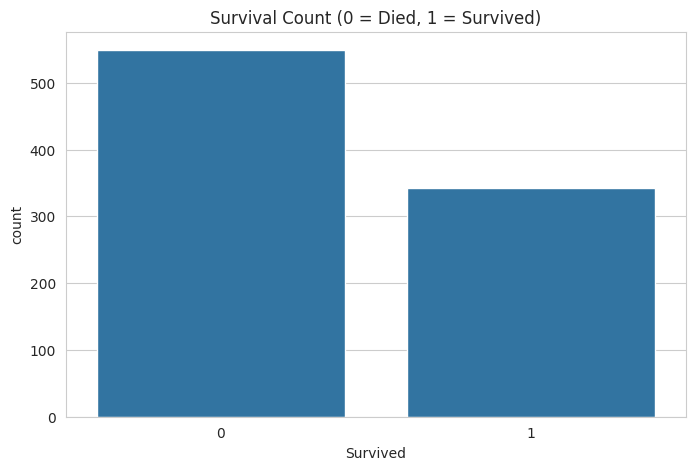

In [28]:
#Count Plot for our Target Variable(Survival)
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

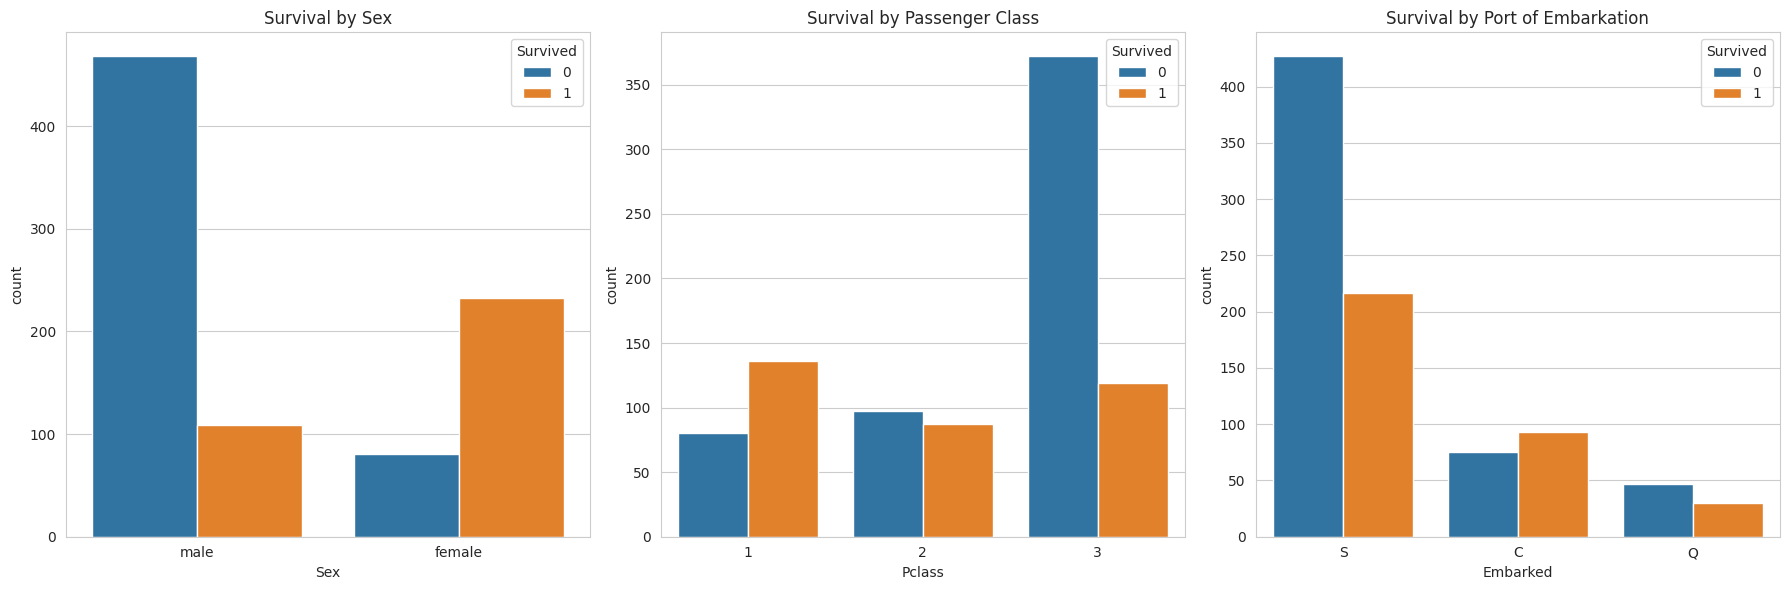

In [34]:
#Count Plots for Key Categorical Variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival by Sex')

sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival by Passenger Class')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival by Port of Embarkation')

plt.tight_layout()
plt.show()

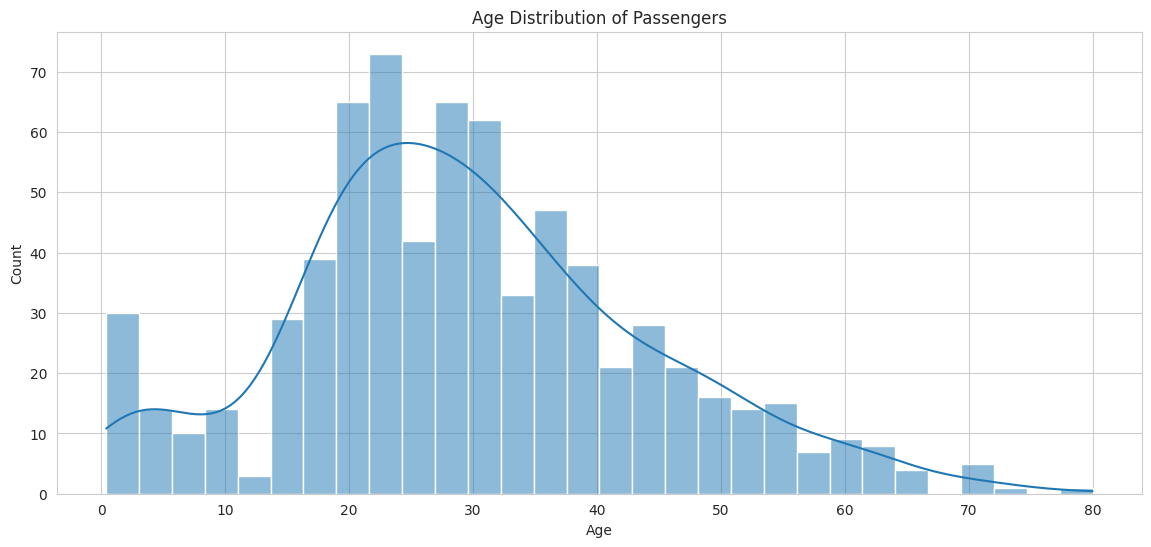

In [36]:
#Histograms for Numerical Features (Age and Fare)
plt.figure(figsize=(14, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True) #The curve(KDE) helps visualize the general shape.

plt.title('Age Distribution of Passengers')
plt.show()

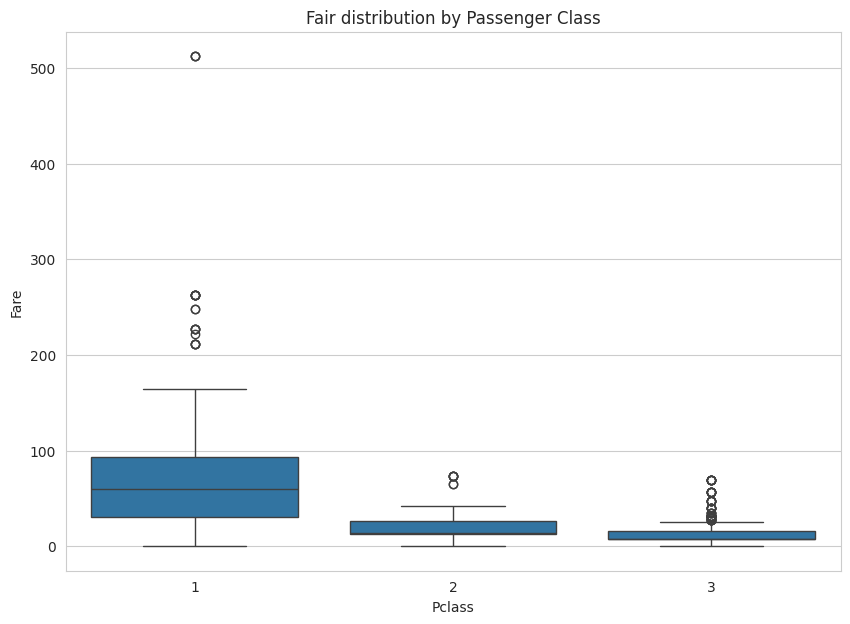

In [37]:
#Box Plot to See Fare by Class (and detect outliers)
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Fare', data=df)

plt.title('Fair distribution by Passenger Class')
plt.show()

In [39]:
#Correlation HeatMap
# we need to convert categorical value to numerical value to incude them in the correlation
df_corr=df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male':0, 'female':1}) # a quick way to covert for heatmap

In [40]:
#selects only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=np.number)

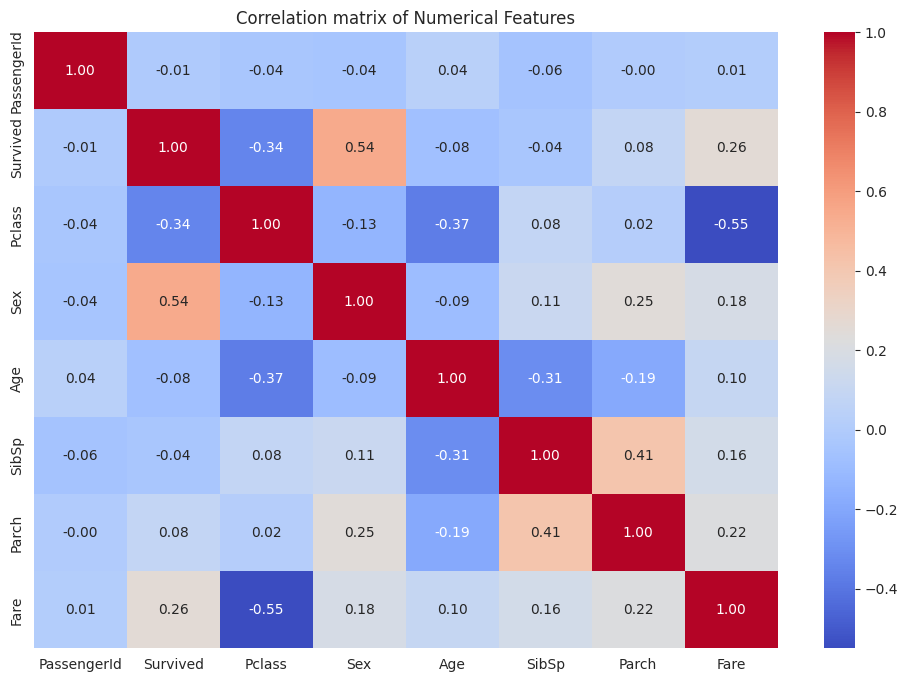

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation matrix of Numerical Features')
plt.show()

# **Cleaning and Prepping the Data**

In [43]:
# Make a copy to keep the original data intact
df_clean = df.copy()

In [45]:
#Handle Missing Values
#Age: Fill with the median Age. It's more robust to outliers than the mean.
median_age = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(median_age)

In [49]:
#Embarked: Fill with the most common port (mode)
mode_embarked = df_clean['Embarked'].mode()
df_clean['Embarked'] = df_clean['Embarked'].fillna(mode_embarked)

In [50]:
#Cabin: Too many missing values we will drop this column
df_clean = df_clean.drop('Cabin', axis=1)

In [52]:
#Feature Engineering: Create new features from existing ones

#Create FamilySize from SibSp and Parch

df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

In [53]:
#create isalone feature

df_clean['IsAlone'] = 0
df_clean.loc[df_clean['FamilySize'] == 1, 'IsAlone'] = 1

In [55]:
#drop irrelevant columns
# PassengerId is just an index, Ticket is messy, Name is complex (though we could extract titles)
df_clean = df_clean.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [57]:
#Encode Categorical Variables
# Convert 'Sex' to 0 and 1
df_clean['Sex'] = df_clean['Sex'].map({'male':0, 'female':1}).astype(int)

In [67]:
# One-Hot Encode 'Embarked'
df_final = pd.get_dummies(df_clean, columns=['Embarked'], drop_first=True).astype(int)

In [68]:
df_final.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,0,22,7,2,0,0,1
1,1,1,1,38,71,2,0,0,0
2,1,3,1,26,7,1,1,0,1
3,1,1,1,35,53,2,0,0,1
4,0,3,0,35,8,1,1,0,1


In [69]:
df_final.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
FamilySize,0
IsAlone,0
Embarked_Q,0
Embarked_S,0


# **Training and Evaluating Models**

In [73]:
# Import scikit-learn tools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [74]:
#Define Features (X) and Target (y)
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

In [75]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
#Scale numerical features
# Note: We fit the scaler ONLY on the training data to prevent data leakage

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [77]:
# --- Model Training ---

In [79]:
# Model 1: Logistic Regression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [95]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) #Tree models don't require scaling, so we can use original data
y_pred_rf = rf.predict(X_test)

In [99]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


Evaluation: LogisticRegression
Accuracy:0.7989
Precision:0.7619
Recall:0.6957
F1-Score:0.7273
AUC-ROC:0.7796



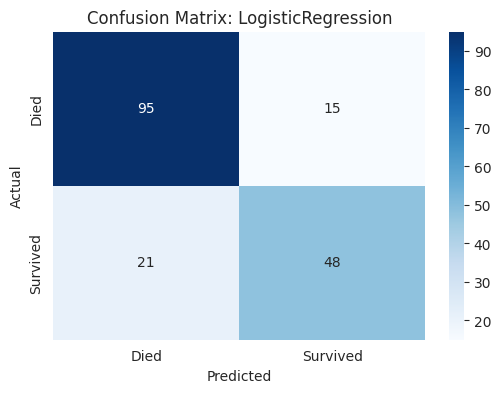


Evaluation: Random Forest
Accuracy:0.8212
Precision:0.7937
Recall:0.7246
F1-Score:0.7576
AUC-ROC:0.8032



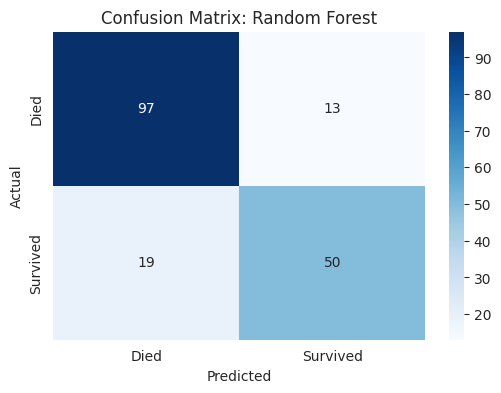


Evaluation: XGBoost
Accuracy:0.8045
Precision:0.7742
Recall:0.6957
F1-Score:0.7328
AUC-ROC:0.7842



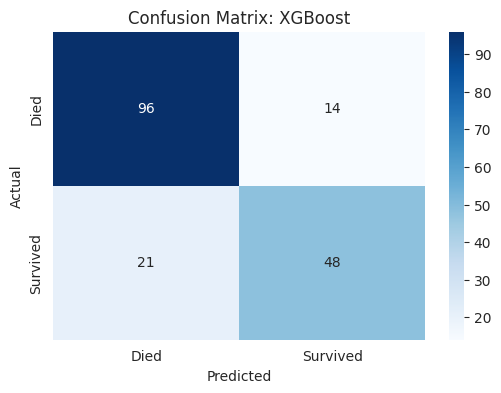

In [100]:
def evaluate_model(y_true, y_pred, model_name):
  print(f"\nEvaluation: {model_name}")
  print(f"Accuracy:{accuracy_score(y_true, y_pred):.4f}")
  print(f"Precision:{precision_score(y_true, y_pred):.4f}")
  print(f"Recall:{recall_score(y_true, y_pred):.4f}")
  print(f"F1-Score:{f1_score(y_true, y_pred):.4f}")
  print(f"AUC-ROC:{roc_auc_score(y_true, y_pred):.4f}\n")


  #Confusion Matrix

  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Died', 'Survived'],
              yticklabels=['Died', 'Survived'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix: {model_name}')
  plt.show()


#evaluate model
evaluate_model(y_test, y_pred_lr, "LogisticRegression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

In [101]:
#Compare Models + Recommend Best Fit

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf),f1_score(y_test, y_pred_xgb)],
    'AUC-ROC':[roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_xgb)]
}

In [105]:
# Convert to a pandas DataFrame for nice display
results_df = pd.DataFrame(results).set_index('Model')

results_df.round(4)

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
Logistic Regression,0.7989,0.7619,0.6957,0.7273,0.7796
Random Forest,0.8212,0.7937,0.7246,0.7576,0.8032
XGBoost,0.8045,0.7742,0.6957,0.7328,0.7842


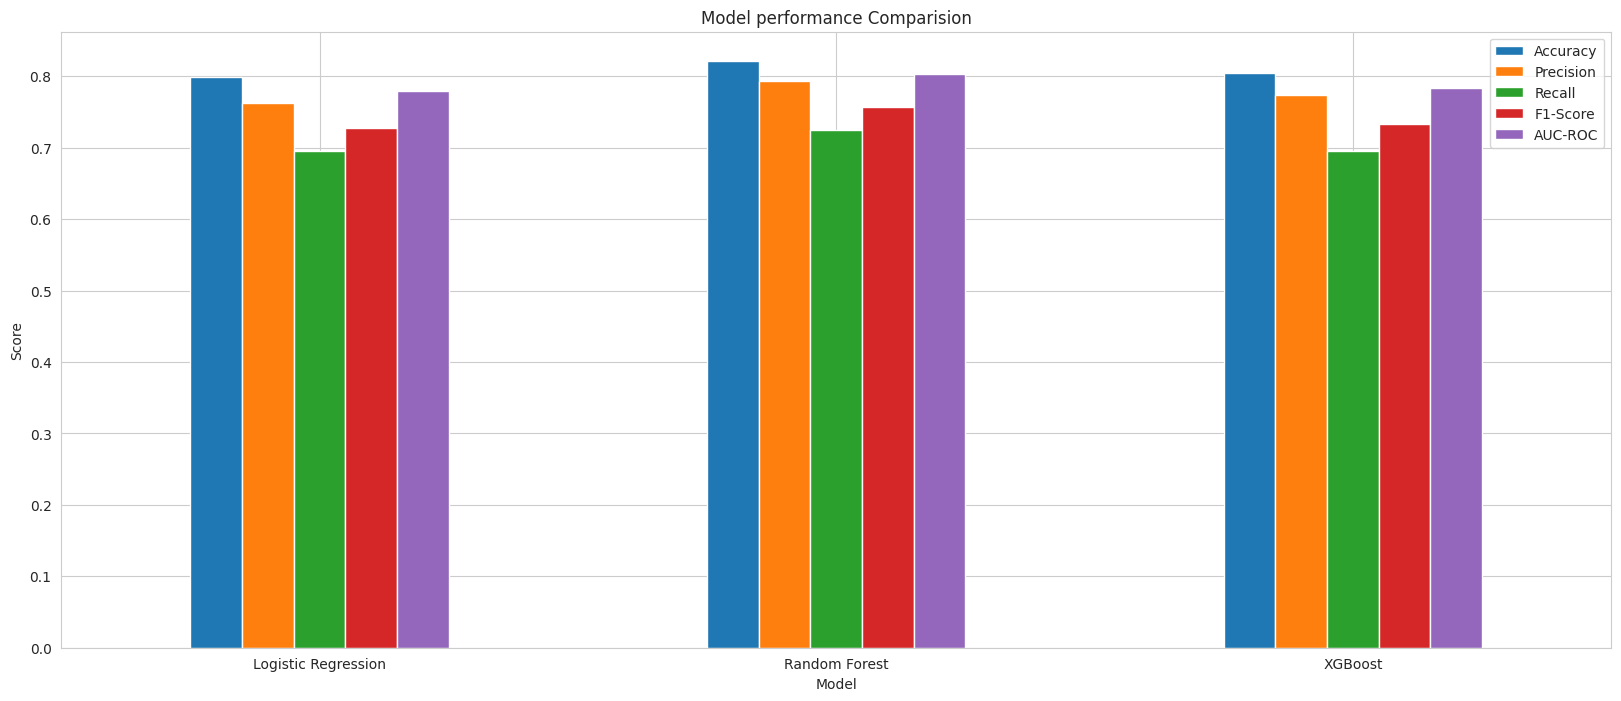

In [111]:
# Plotting the results for visual comparison
results_df.plot(kind='bar', figsize=(20, 8))
plt.title('Model performance Comparision')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()